In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy as sp
import scipy.stats
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Read json to dataframe:


In [24]:
json = '../resource/parsed-docstrings.json'
all_docstrings = '../../docstring-length-and-component-distribution/resource/allDocstrings.json'
data = pd.read_json(json)
all_docstrings_data = pd.read_json(all_docstrings)
df = pd.DataFrame(data)
all_docstrings_df = pd.DataFrame(all_docstrings_data)



Function for removing outliers:


In [25]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


<h3>Number of parsable docstrings, and the number of Projects in which they occur</h3>


In [26]:

#Number of all docstrings:
len(all_docstrings_df.index)


#Number of parsable docstrings:
len(df.index)

#Percentage of parsable docstrings:
len(df.index) / len(all_docstrings_df.index) * 100

len(df.groupby("sourceProject"))



151740

148764

98.03875049426651

91

<h4>Remove Classes and Modules</h4>


In [27]:
df = df[df.containerType == "FUNCTION"]
len(df.index)
len(df.index) / len(all_docstrings_df.index) * 100
len(df.groupby("sourceProject"))


115733

76.27059443785423

87

<h3>Distribution of format notations:<h3>


,numberOfLines
count,20727.000000
mean,11.791142
std,14.041723
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,257.000000


RESTRUCTUREDTEXT    8536
GOOGLESTYLE         7638
NUMPYDOC            4481
EPYTEXT               72
Name: docstringFormat, dtype: int64

Text(0.5, 0, 'Number of Lines')

Text(0, 0.5, 'Amount of Docstrings')

17.90932577570788

211

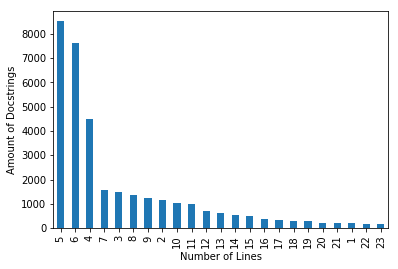

In [28]:
array = ['GOOGLESTYLE', 'RESTRUCTUREDTEXT', 'EPYTEXT', 'NUMPYDOC']
docstrings_with_format = df.loc[df['docstringFormat'].isin(array)]
docstrings_with_format.describe()
pd.value_counts(df["docstringFormat"])
format_df = pd.value_counts(df["docstringFormat"]).plot.bar()


first_90_percent_with_format = docstrings_with_format.loc[docstrings_with_format.numberOfLines <= docstrings_with_format["numberOfLines"].quantile(0.90)]

pd.value_counts(first_90_percent_with_format["numberOfLines"]).plot.bar()
plt.xlabel("Number of Lines")
plt.ylabel("Amount of Docstrings")
plt.savefig("length_distribution_parsable_with_format.png")

#percentage of formatted docstrings
len(docstrings_with_format.index) / len(df.index) * 100
oneliner_with_format = docstrings_with_format[docstrings_with_format.numberOfLines == 1]
len(oneliner_with_format.index)

multiline_format_docstrings = docstrings_with_format[docstrings_with_format.numberOfLines > 1];
multiline_docstrings = df[df.numberOfLines > 1]



<h3>Distribution of Line Count</h3>


Text(0.5, 0, 'Number of Lines')

Text(0, 0.5, 'Amount of Docstrings')

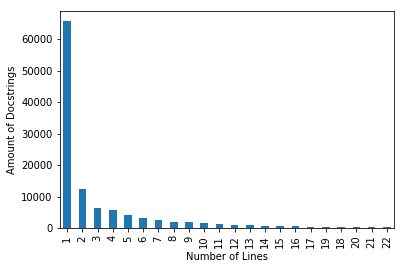

In [29]:
first_975_percent = df.loc[(df.numberOfLines <= df["numberOfLines"].quantile(0.975)) & (df.numberOfLines > 0)]

pd.value_counts(first_975_percent["numberOfLines"]).plot.bar()
plt.xlabel("Number of Lines")
plt.ylabel("Amount of Docstrings")
plt.savefig("length_distribution_parsable_docstrings.png")


<h3>Plot of all docstrings and docstrings that follow a particular format notation:</h3>


115733

20727

<BarContainer object of 2 artists>

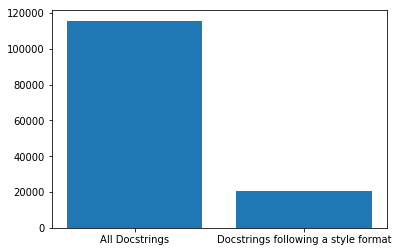

In [30]:
all_docstrings_count = len(df.index)
docstring_format_count = len(docstrings_with_format.index)
all_docstrings_count
docstring_format_count
plt.bar(["All Docstrings", "Docstrings following a style format"], [all_docstrings_count, docstring_format_count])



<h3>Analysis of multi-line docstrings</h3>


In [31]:

#Number of multi-line docstrings, total and with format:
len(multiline_format_docstrings.index)
len(multiline_docstrings.index)

#Percentage of docstrings with format in multi-line docstrings:
len(multiline_format_docstrings) / len(multiline_docstrings) * 100








20516

49816

41.18355548418179

<h3>Distribution of docstrings that follow the notation and the structure of a particular format</h3>


In [40]:
structured_docstrings_with_format = docstrings_with_format.loc[(docstrings_with_format['hasArgumentComponent'] == True) & (docstrings_with_format['hasReturnComponent'] == True) & (docstrings_with_format['hasShortSummary'] == True)]
docstrings_with_format.groupby('docstringFormat').count()
structured_docstrings_with_format.groupby('docstringFormat').count()

#Create data frames, which only contain information about docstring format:

docstrings_with_format['Key'] = 'notStructured'
structured_docstrings_with_format['Key'] = 'structured'

all_format_docstrings = pd.concat([docstrings_with_format, structured_docstrings_with_format], keys=['structured', 'notStructured'])
all_format_docstrings_grouped = all_format_docstrings.groupby(['docstringFormat', 'Key'])

#all_format_docstrings_grouped.describe()

#DFGPlot = all_format_docstrings_grouped["docstringFormat"].count().unstack('Key').plot(kind='bar')





,argumentsList,containerType,content,description,hasArgumentComponent,hasDescription,hasRaiseComponent,hasReturnComponent,hasShortSummary,numberOfLines,raisesList,relativePath,returnsList,shortSummary,sourceProject,Key
docstringFormat,,,,,,,,,,,,,,,,
EPYTEXT,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
GOOGLESTYLE,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638,7638
NUMPYDOC,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481
RESTRUCTUREDTEXT,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536


,argumentsList,containerType,content,description,hasArgumentComponent,hasDescription,hasRaiseComponent,hasReturnComponent,hasShortSummary,numberOfLines,raisesList,relativePath,returnsList,shortSummary,sourceProject,Key
docstringFormat,,,,,,,,,,,,,,,,
EPYTEXT,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
GOOGLESTYLE,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981
NUMPYDOC,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100
RESTRUCTUREDTEXT,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220


C:\Users\matej\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\matej\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h5>method to calculate percentage</h5>


In [33]:
def calc_percentage(row):
    
    return row['docstrings_with_format']/row['all_docstrings'] * 100


<h3>Projects that contain styled docstrings</h3>


,sourceProject,all_docstrings
0,saltstack\salt,12261
1,tensorflow\models,3496
2,python\cpython,3472
3,ansible\ansible,3299
4,django\django,3059
5,pypa\pipenv,2161
6,matplotlib\matplotlib,2002
7,pandas-dev\pandas,1939
8,XX-net\XX-Net,1765
9,scikit-learn\scikit-learn,1461


,sourceProject,docstrings_with_format
0,saltstack\salt,3715
1,tensorflow\models,3332
2,ansible\ansible,2220
3,pandas-dev\pandas,1436
4,scikit-learn\scikit-learn,1246
5,matplotlib\matplotlib,886
6,RaRe-Technologies\gensim,797
7,tensorflow\magenta,767
8,pypa\pipenv,756
9,XX-net\XX-Net,690


0      30.299323
1      95.308924
2       5.904378
3      67.293119
4       0.784570
5      34.983804
6      44.255744
7      74.058793
8      39.093484
9      85.284052
10      2.470187
11     69.098278
12     84.160507
13     21.452145
14     96.477987
15     31.492537
16     72.461274
17     69.892473
18      0.364964
19     37.904762
20      5.139186
21     16.629712
22     42.105263
23     26.133333
24     83.602151
25     56.953642
26      1.672241
27     23.487544
28     24.714829
29     67.965368
         ...    
43      6.000000
44      6.000000
45     96.875000
46     75.789474
47      5.617978
48      4.597701
49      1.204819
50     38.271605
51     53.731343
52     24.242424
53     50.793651
54      4.761905
55      4.838710
56      1.639344
57     27.777778
58      2.000000
59     28.260870
60     95.121951
61      2.631579
62     61.111111
63      5.714286
64     80.000000
65     50.000000
66     23.076923
67     31.818182
68    100.000000
69     86.666667
70    100.0000

,all_docstrings,docstrings_with_format,format_percentage
count,73.000000,73.000000,73.000000
mean,678.136986,281.041096,41.400560
std,1611.500313,666.349684,32.259759
min,1.000000,1.000000,0.364964
25%,63.000000,13.000000,8.256881
50%,138.000000,36.000000,37.500000
75%,548.000000,172.000000,67.965368
max,12261.000000,3715.000000,100.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1e0f7cc6c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0f7ce0198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0f7cc65f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0f7ce0d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0f7cfacc0>],
 'means': []}

([<matplotlib.axis.YTick at 0x1e0f76b3c50>],
 <a list of 1 Text yticklabel objects>)

Text(0, 0.5, 'Formatted Docstrings per Project')

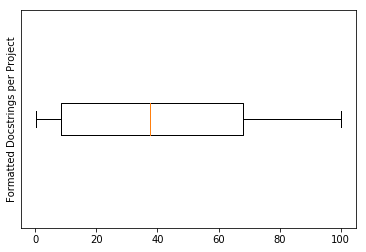

In [38]:
projects_with_docstrings = pd.DataFrame(multiline_docstrings, columns=["sourceProject"])

docstrings_per_project = pd.DataFrame(pd.value_counts(projects_with_docstrings["sourceProject"]).reset_index())
docstrings_per_project.columns = ['sourceProject', 'all_docstrings']



projects_and_formats = pd.DataFrame(multiline_format_docstrings, columns=["sourceProject", "docstringFormat"])

docstrings_with_format_per_project = pd.DataFrame(pd.value_counts(projects_and_formats["sourceProject"]).reset_index())
docstrings_with_format_per_project.columns = ['sourceProject', 'docstrings_with_format']

grouped_projects = projects_and_formats.merge(docstrings_with_format_per_project).groupby("sourceProject")

projects_with_different_formats = grouped_projects.apply(lambda x: x['docstringFormat'].unique())
docstrings_per_project
pd.DataFrame(docstrings_with_format_per_project)



merged_projects = docstrings_per_project.merge(docstrings_with_format_per_project)
merged_projects['format_percentage'] = merged_projects.apply(lambda row: calc_percentage(row), axis=1)
percentage_of_formats = merged_projects["format_percentage"]
percentage_of_formats
merged_projects.describe()
plt.boxplot(percentage_of_formats, vert=False)
plt.yticks(np.arange(1),"Formatted Docstrings per Project")
plt.ylabel("Formatted Docstrings per Project")
plt.savefig("boxplot_formatted_docstrings_per_project.png")



<h3>Check validity of meta-model</h3>


20516

14395

14198

11754

1528

7.44784558393449

70.1647494638331

69.20452329888867

57.291869760187176

7.44784558393449

7317

,summary_percentage,argument_percentage,return_value_percentage,exception_percentage
count,73.000000,73.000000,73.000000,73.000000
mean,64.161164,63.983619,50.056195,4.931191
std,31.800389,30.523286,32.945314,10.899989
min,0.000000,0.000000,0.000000,0.000000
25%,40.000000,43.518519,20.689655,0.000000
50%,66.666667,75.000000,50.000000,0.512821
75%,96.969697,89.230769,79.052970,2.893891
max,100.000000,100.000000,100.000000,66.666667


support      itemsets
0  0   0.000000           (0)
   1   0.000000           (1)
   2   0.000000           (2)
   3   0.000000           (3)
   4   0.000000        (0, 1)
   5   0.000000        (0, 2)
   6   0.000000        (0, 3)
   7   0.000000        (1, 2)
   8   0.000000        (1, 3)
   9   0.000000        (2, 3)
   10  0.000000     (0, 1, 2)
   11  0.000000     (0, 1, 3)
   12  0.000000     (0, 2, 3)
   13  0.000000     (1, 2, 3)
   14  0.000000  (0, 1, 2, 3)
1  0   0.400000           (0)
   1   0.600000           (1)
   2   0.800000           (2)
   3   0.000000           (3)
   4   0.200000        (0, 1)
   5   0.400000        (0, 2)
   6   0.000000        (0, 3)
   7   0.400000        (1, 2)
   8   0.000000        (1, 3)
   9   0.000000        (2, 3)
   10  0.200000     (0, 1, 2)
   11  0.000000     (0, 1, 3)
   12  0.000000     (0, 2, 3)
   13  0.000000     (1, 2, 3)
   14  0.000000  (0, 1, 2, 3)
...         ...           ...
71 0   0.333333           (0)
   1   0.333333           (1)
   2   0.333333           (2)
   3   0.000000           (3)
   4   0.333333        (0, 1)
   5   0.333333        (0, 2)
   6   0.000000        (0, 3)
   7   0.333333        (1, 2)
   8   0.000000        (1, 3)
   9   0.000000        (2, 3)
   10  0.333333     (0, 1, 2)
   11  0.000000     (0, 1, 3)
   12  0.000000     (0, 2, 3)
   13  0.000000     (1, 2, 3)
   14  0.000000  (0, 1, 2, 3)
72 0   0.416667           (0)
   1   0.458333           (1)
   2   0.916667           (2)
   3   0.000000           (3)
   4   0.333333        (0, 1)
   5   0.333333        (0, 2)
   6   0.000000        (0, 3)
   7   0.416667        (1, 2)
   8   0.000000        (1, 3)
   9   0.000000        (2, 3)
   10  0.291667     (0, 1, 2)
   11  0.000000     (0, 1, 3)
   12  0.000000     (0, 2, 3)
   13  0.000000     (1, 2, 3)
   14  0.000000  (0, 1, 2, 3)

[1095 rows x 2 columns]

count    73.000000
mean      0.440704
std       0.296738
min       0.000000
25%       0.200000
50%       0.416667
75%       0.689655
max       1.000000
Name: support, dtype: float64

count    73.000000
mean      0.348347
std       0.296896
min       0.000000
25%       0.076923
50%       0.322072
75%       0.487805
max       1.000000
Name: support, dtype: float64

count    73.000000
mean      0.374671
std       0.296198
min       0.000000
25%       0.125000
50%       0.333333
75%       0.562500
max       1.000000
Name: support, dtype: float64

count    73.000000
mean      0.269328
std       0.264639
min       0.000000
25%       0.058824
50%       0.209003
75%       0.372922
max       1.000000
Name: support, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0f7b617f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0f7b61898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0f7b46c50>,
 'medians': [<matplotlib.lines.Line2D at 0x1e0f7b61fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e0f7b7b358>,
 'means': [<matplotlib.lines.Line2D at 0x1e0f7b7b0b8>,
  <matplotlib.lines.Line2D at 0x1e0f7c16ba8>]}

([<matplotlib.axis.XTick at 0x1e0f7b2b668>,
 <a list of 5 Text xticklabel objects>)

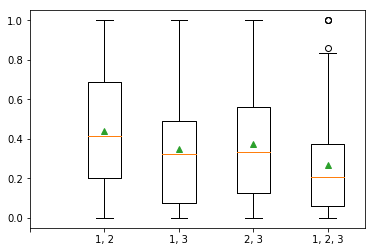

In [37]:
structured_multiline_docstrings = multiline_format_docstrings.loc[(multiline_format_docstrings['hasArgumentComponent'] == True) & (multiline_format_docstrings['hasReturnComponent'] == True) & (multiline_format_docstrings['hasShortSummary'] == True)]
len(multiline_format_docstrings)

#Get percentages of components in formatted docstrings:
len(multiline_format_docstrings[multiline_format_docstrings.hasShortSummary == True])
len(multiline_format_docstrings[multiline_format_docstrings.hasArgumentComponent == True])
len(multiline_format_docstrings[multiline_format_docstrings.hasReturnComponent == True])
len(multiline_format_docstrings[multiline_format_docstrings.hasRaiseComponent == True])

len(multiline_format_docstrings[multiline_format_docstrings.hasRaiseComponent == True])/len(multiline_format_docstrings) * 100

len(multiline_format_docstrings[multiline_format_docstrings.hasShortSummary == True])/len(multiline_format_docstrings) * 100
len(multiline_format_docstrings[multiline_format_docstrings.hasArgumentComponent == True])/len(multiline_format_docstrings) * 100
len(multiline_format_docstrings[multiline_format_docstrings.hasReturnComponent == True])/len(multiline_format_docstrings) * 100


len(multiline_format_docstrings[multiline_format_docstrings.hasRaiseComponent == True])/len(multiline_format_docstrings) * 100
len(structured_multiline_docstrings.index)

def get_occurrence_percentage(df_in):
    df_in["argument_percentage"] = len(df_in[df_in.hasArgumentComponent == True]) / len(df_in["hasArgumentComponent"]) * 100
    df_in["return_value_percentage"] = len(df_in[df_in.hasReturnComponent == True]) / len(df_in["hasReturnComponent"]) * 100
    df_in["summary_percentage"] = len(df_in[df_in.hasShortSummary == True]) / len(df_in["hasShortSummary"]) * 100
    df_in["exception_percentage"] = len(df_in[df_in.hasRaiseComponent == True]) / len(df_in["hasRaiseComponent"]) * 100
    
    return df_in

def get_frequent_item_set(df_in):
    tmp_df = pd.DataFrame(df_in, columns=["hasShortSummary", "hasArgumentComponent", "hasReturnComponent", "hasRaiseComponent"])
    
    return apriori(tmp_df, min_support=0)


component_percentage_per_project_df = pd.DataFrame(multiline_format_docstrings.groupby(['sourceProject']).apply(get_occurrence_percentage), columns=['sourceProject', 'argument_percentage', 'return_value_percentage', 'summary_percentage', 'exception_percentage'])
component_percentage_per_project_df = component_percentage_per_project_df.groupby('sourceProject', as_index=False).agg({'summary_percentage': 'mean', 'argument_percentage': 'mean', 'return_value_percentage': 'mean', 'exception_percentage': 'mean'})
component_percentage_per_project_df.describe()

#plt.boxplot([component_percentage_per_project_df["summary_percentage"], component_percentage_per_project_df["argument_percentage"], component_percentage_per_project_df["return_value_percentage"], component_percentage_per_project_df["exception_percentage"]])
#plt.xticks(np.arange(5), ("","Summary", "Parameters", "Return Values", "Exceptions"))
#plt.savefig("boxplot_of_component_per_project.png")

frequent_item_set_per_project = pd.DataFrame(multiline_format_docstrings.groupby(['sourceProject'], as_index=False).apply(get_frequent_item_set))
frequent_item_set_per_project
summary_parameter_itemset = frequent_item_set_per_project[frequent_item_set_per_project["itemsets"] == {0,1}]
summary_return_value_itemset = frequent_item_set_per_project[frequent_item_set_per_project["itemsets"] == {0,2}]
parameter_retrun_value_itemset = frequent_item_set_per_project[frequent_item_set_per_project["itemsets"] == {1,2}]
summary_return_parameter_itemset = frequent_item_set_per_project[frequent_item_set_per_project["itemsets"] == {0, 1, 2}]
summary_parameter_itemset["support"].describe()
summary_return_value_itemset["support"].describe()
parameter_retrun_value_itemset["support"].describe()
summary_return_parameter_itemset["support"].describe()

plt.boxplot([summary_parameter_itemset["support"], summary_return_value_itemset["support"], parameter_retrun_value_itemset["support"], summary_return_parameter_itemset["support"]], showmeans=True)
plt.xticks(np.arange(5), ("","1, 2", "1, 3", "2, 3", "1, 2, 3"))
plt.savefig("boxplot_itemsets_per_project.png")

<h3>Most frequent item set</h3>


In [15]:

meta_model_components = pd.DataFrame(multiline_format_docstrings, columns=["hasShortSummary", "hasArgumentComponent", "hasReturnComponent", "hasRaiseComponent"])
meta_model_components


test_df = apriori(meta_model_components, min_support=0.01)
test_df




,hasShortSummary,hasArgumentComponent,hasReturnComponent,hasRaiseComponent
48,False,False,False,False
298,False,True,True,False
615,False,False,False,False
723,True,True,True,False
724,True,True,True,False
791,True,False,True,False
792,True,False,True,False
794,False,False,True,False
795,True,False,True,False
796,True,False,True,False


,support,itemsets
0,0.701647,(0)
1,0.692045,(1)
2,0.572919,(2)
3,0.074478,(3)
4,0.527588,"(0, 1)"
5,0.440339,"(0, 2)"
6,0.066631,"(0, 3)"
7,0.455644,"(1, 2)"
8,0.067606,"(1, 3)"
9,0.055274,"(2, 3)"
